# Introduction
## Data
- My project uses a kaggle dataset sourced from: https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews/code
- This dataset contains about 32.9k reviews with 4 columns for each review describing the source, review description, rating, and review date.
- My motivations for looking into this data were to first to challenge myself with a NLP dataset as I don't often work with NLP data. Second, with all the news on Threads recently, I thought it would be interesting to evaluate what people thought of the app and if these reviews had some underlying pattern. It'd also be interesting to look further into what draws people to new social media apps considering the established giants of the social media industry.  

## Research Question
1. Does the Threads app possess signs of longetivity in the oligopoly of social media apps?

    a. What do people commonly think about the app?
    
    b. What are the similarities and differences between a 5 star and 1 star review?


# Data Exploration

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("threads_reviews.csv")

In [3]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [5]:
def days_after(date):
    # date that Threads was launched:
    date_start = datetime.datetime(2023, 7, 5)
    
    date_obj = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    
    date_diff = date_obj - date_start
    return date_diff.days

In [6]:
df["review_length"] = df["review_description"].apply(lambda x: len(x))
df["days_after_launch"] = df["review_date"].apply(days_after)

In [7]:
df.describe()

,rating,review_length,days_after_launch
count,32910.000000,32910.000000,32910.000000
mean,3.398481,65.734913,3.868247
std,1.751480,104.900408,4.287783
min,1.000000,1.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,4.000000,28.000000,2.000000
75%,5.000000,79.000000,5.000000
max,5.000000,5947.000000,20.000000


In [8]:
df.head()

,source,review_description,rating,review_date,review_length,days_after_launch
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,465,3
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,475,14
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,497,1
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,487,5
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,426,1


In [9]:
ratings_count = df["rating"].value_counts().reset_index()
sources_count = df["source"].value_counts().reset_index()
avg_rating = df.groupby("days_after_launch")["rating"].mean().reset_index()

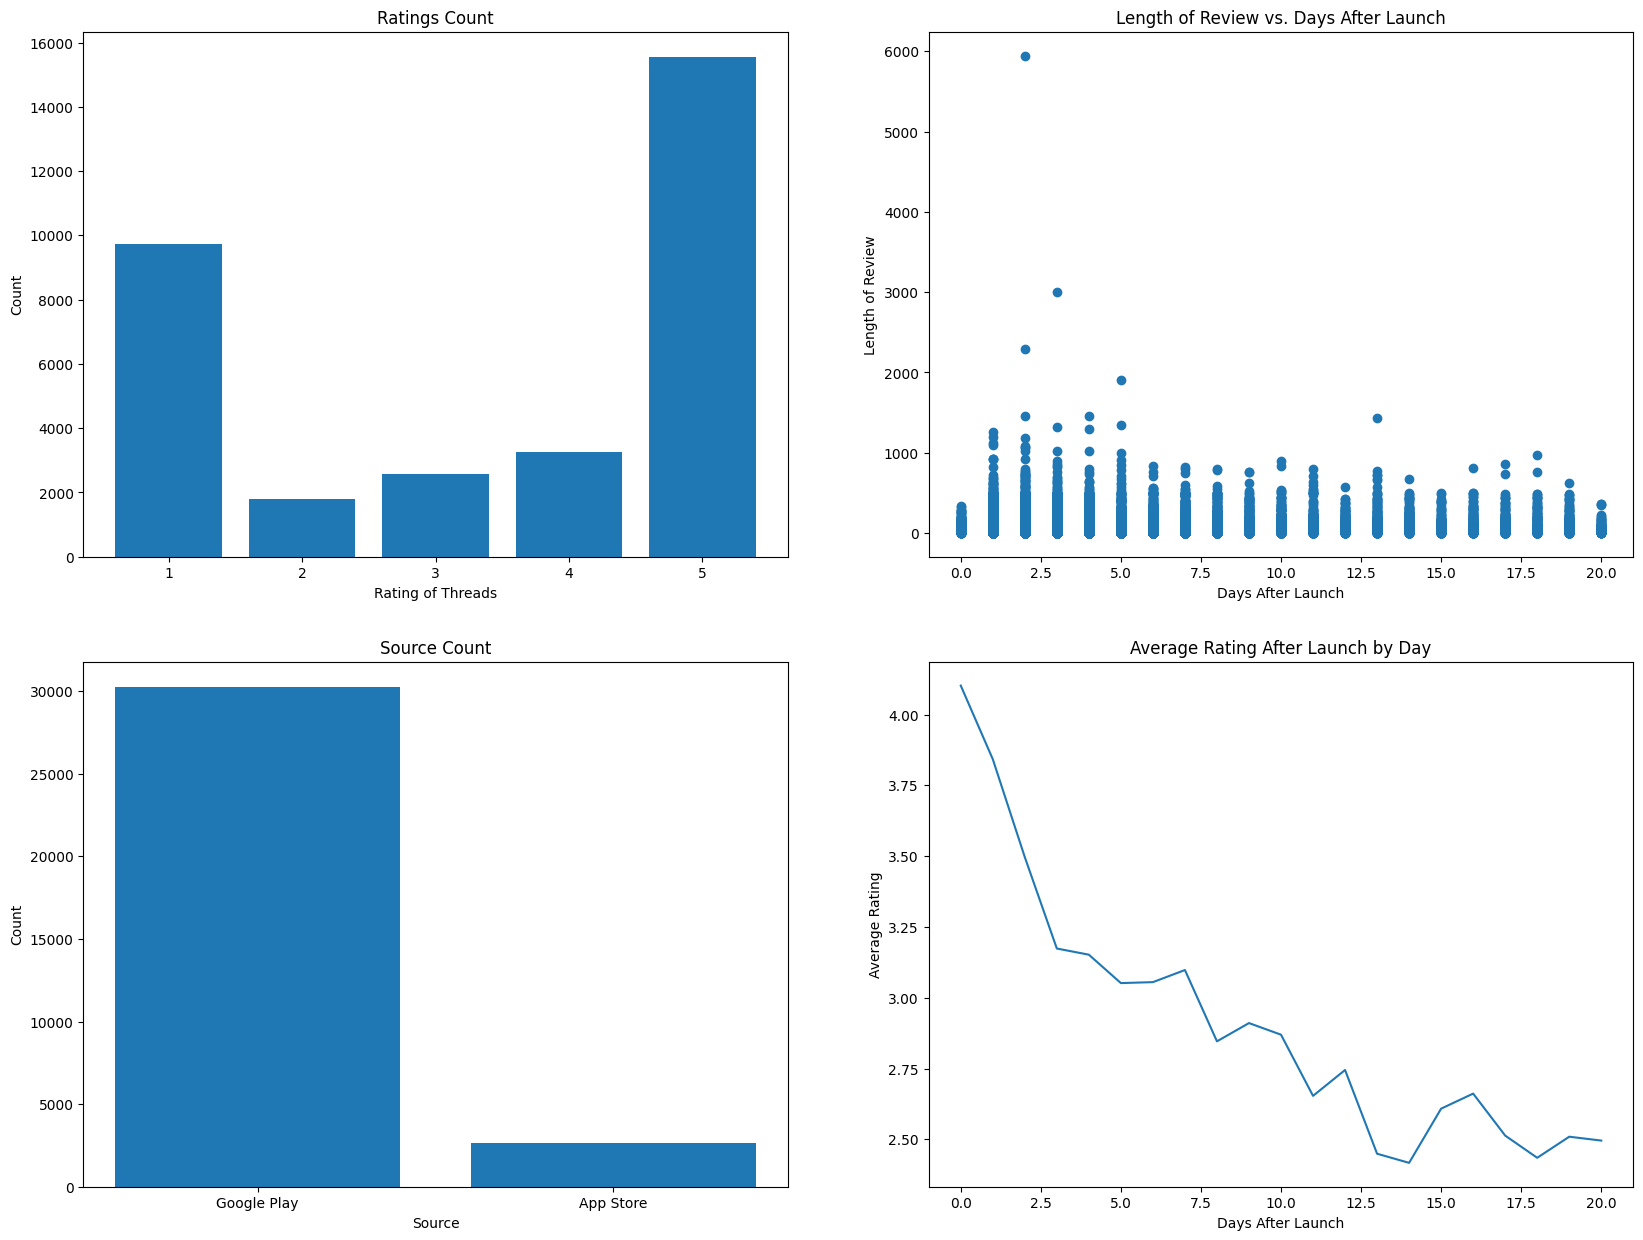

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

ax[0,0].bar(ratings_count["index"], ratings_count["rating"])
ax[0,0].set_title("Ratings Count")
ax[0,0].set_xlabel("Rating of Threads")
ax[0,0].set_ylabel("Count")

ax[0,1].scatter(df["days_after_launch"], df["review_length"])
ax[0,1].set_title("Length of Review vs. Days After Launch")
ax[0,1].set_xlabel("Days After Launch")
ax[0,1].set_ylabel("Length of Review")

ax[1,0].bar(sources_count["index"], sources_count["source"])
ax[1,0].set_title("Source Count")
ax[1,0].set_xlabel("Source")
ax[1,0].set_ylabel("Count")

ax[1,1].plot(avg_rating["days_after_launch"], avg_rating["rating"])
ax[1,1].set_title("Average Rating After Launch by Day")
ax[1,1].set_xlabel("Days After Launch")
ax[1,1].set_ylabel("Average Rating")

plt.show()

# Analysis
- After analyzing the above statistics related to count, I want to focus the rest of my analysis on the reviews themselves. Therefore, I want to dig deeper in to the language used in these review, commonalities, and other factors related to the language. 
- I may potentially add more visualizations on Text Analysis. Need to do inital analysis first to see if supplemental visualizations could be helpful.

## Visualizations
Visualization 1:
- Common words in Positive Reviews (Bar Chart or related)

Visualization 2:
- Common words in Negative Reviews (Bar Chart or related)

Visualization 3:
- Sentiment in Reviews After Launch by Day (Line or Scatter Plot)

Visualization 4:
- Number of Reviews by day after Launch (Line or Scatter Plot)
